<a href="https://colab.research.google.com/github/fedecicco/excel/blob/main/Analisi_disastri_aerei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

dataframe = pd.read_csv("/content/aviation-accidents.csv")

In [ ]:
dataframe.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


## DATA PREPARATION & CLEANING

In [ ]:
columns = ['date', 'type', 'registration', 'operator', 'location', 'country', 'cat', 'year']

for column in columns:
    print(f"Unique values in column {column}:")
    print(dataframe[column].unique())
    print("\n")


Unique values in column date:
['date unk.' '02-AUG-1919' '11-AUG-1919' ... '12-MAY-2023' '14-MAY-2023'
 '15-MAY-2023']


Unique values in column type:
['Antonov An-12B' 'Antonov An-12BK' 'Antonov An-12BP' ...
 'Antonov An-72-100D' 'Boeing 737-33A (SF)' 'Boeing 777-233LR']


Unique values in column registration:
['T-1206' 'T-1204' 'T-1201' ... 'PK-NGA' '5X-RBR' 'D-CGFQ']


Unique values in column operator:
['Indonesian AF' 'Soviet AF' 'GUSMP, Directorate of Polar Aviation' ...
 'Angkasa Super Services' 'Nasional Global Aviasi' 'Bar Aviation']


Unique values in column location:
[nan 'Tiksi Airport (IKS)' 'Massawa Airport ...' ... 'Fentheik Airstrip'
 'Kampala-Kajjansi...' 'Hohn Air Base']


Unique values in column country:
['Unknown country' 'Russia' 'Eritrea' 'Libya' 'Poland' '?' 'India'
 'Bulgaria' 'Bahamas' 'Zimbabwe' 'Mauritania' 'Cyprus' 'Mexico'
 'New Caledonia' 'Honduras' 'Peru' 'Kenya' 'Antarctica' 'Latvia' 'Yemen'
 'Ukraine' 'France' 'Liberia' 'Italy' 'U.K.' 'South Africa' 'Sud

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [ ]:
import numpy as np
dataframe['year'] = dataframe['year'].apply(lambda x: x if x != "unknown" else np.nan)
dataframe['country']=dataframe['country'].apply(lambda x: x if x != "Unknown country" else np.nan)
dataframe['date'] = dataframe['country'].apply(lambda x: x if x!="date unk." else np.nan) #dataframe[dataframe[dataframe['date'] != "date unk."]]

dataframe = dataframe.dropna()

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18595 entries, 62 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          18595 non-null  object
 1   type          18595 non-null  object
 2   registration  18595 non-null  object
 3   operator      18595 non-null  object
 4   fatalities    18595 non-null  object
 5   location      18595 non-null  object
 6   country       18595 non-null  object
 7   cat           18595 non-null  object
 8   year          18595 non-null  object
dtypes: object(9)
memory usage: 1.4+ MB


In [ ]:
dataframe['fatalities'].unique()

array(['1', '0', '4', '2', '5', '6', '3', '7', '14', '5+ 1', '8', '16',
       '12', '9', '15', '10', '11', '35+ 9', '13', '2+ 2', '17', '19',
       '20', '0+ 1', '18', '13+ 1', '25', '29', '23', '5+ 7', '36', '26',
       '22', '12+ 1', '21', '7+ 6', '35', '24', '32', '27', '31', '2+ 1',
       '34', '28', '20+ 5', '0+ 2', '30', '41', '59', '13+ 7', '45', '44',
       '37', '3+ 5', '4+ 6', '30+ 1', '19+ 1', '39', '11+ 1', '43', '53',
       '0+ 3', '50', '14+ 3', '3+ 1', '52', '8+ 1', '5+ 3', '40', '0+ 6',
       '8+ 2', '33', '48', '55', '1+ 1', '38', '0+ 7', '32+ 1', '13+ 2',
       '80', '1+ 2', '46', '58', '51', '10+ 3', '56', '23+ 7', '29+ 4',
       '2+ 3', '5+ 2', '87', '129', '42', '5+ 10', '35+ 1', '47', '66',
       '1+ 4', '5+ 4', '14+ 1', '74', '70', '62', '17+ 1', '4+ 3',
       '18+ 2', '20+ 2', '67', '79', '5+ 6', '6+ 1', '61', '41+ 1',
       '21+ 2', '99', '64', '3+ 4', '65', '1+ 9', '68', '54', '3+ 8',
       '32+ 10', '6+ 2', '63', '7+ 1', '84+ 6', '20+ 32', '6+ 3'

In [ ]:
for value in dataframe['fatalities']:
    if str("+") in value:
      x,y=value.split("+")
      x=int(x)
      y=int(y)
      z=x+y
      dataframe['fatalities']=dataframe['fatalities'].replace(value,z)

dataframe['fatalities'] = pd.to_numeric(dataframe['fatalities'], errors='coerce')

In [ ]:
dataframe['fatalities'].unique()

array([   1,    0,    4,    2,    5,    6,    3,    7,   14,    8,   16,
         12,    9,   15,   10,   11,   44,   13,   17,   19,   20,   18,
         25,   29,   23,   36,   26,   22,   21,   35,   24,   32,   27,
         31,   34,   28,   30,   41,   59,   45,   37,   39,   43,   53,
         50,   52,   40,   33,   48,   55,   38,   80,   46,   58,   51,
         56,   87,  129,   42,   47,   66,   74,   70,   62,   67,   79,
         61,   99,   64,   65,   68,   54,   63,   90,   73,   78,   72,
         83,   77,   95,  111,  107,  130,  113,   84,   94,   81,   86,
         97,  101,  118,   85,   49,   57,  121,  117,  133,  124,   98,
         82,  126,   88,  102,  123,  155,  100,   76,   92,  112,  109,
         75,  162,   69,   91,  104,  115,  122,  156,  174,   60,  176,
        108,  106,  346,  191,  138,  188,  154,   71,  335,  248,  131,
        213,  142,  183,  273,  257,  128,  146,  166,  301,   89,  110,
        180,  137,  132,  153,  119,  269,  181,  1

## Numero totale di morti per incidenti dal **1919**

In [ ]:
sum_fatalities = dataframe['fatalities'].sum()
sum_fatalities

128367

## Numero totale di morti per categoria

In [ ]:
dataframe_grouped_bycat = dataframe['fatalities'].groupby(dataframe['cat']).sum()
dataframe_grouped_bycat

,fatalities
cat,
A1,116092
A2,150
C1,8308
C2,51
H1,3592
H2,97
I1,0
I2,0
O1,75


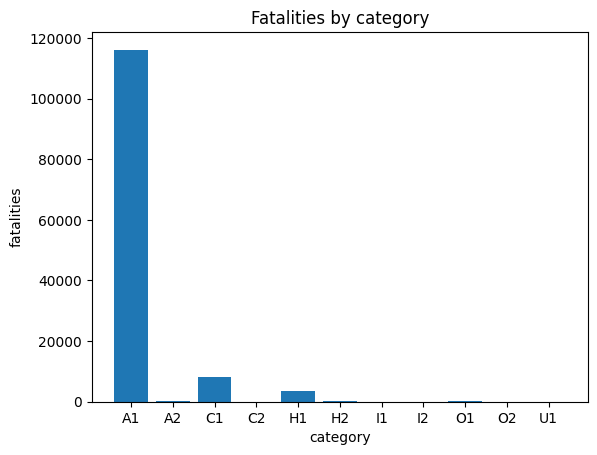

In [ ]:
plt.bar(dataframe_grouped_bycat.index, dataframe_grouped_bycat.values)
plt.xlabel("category")
plt.ylabel("fatalities")
plt.title("Fatalities by category")
plt.show()

##Top 5 Incidenti con maggior numero di morti

In [ ]:
dataframe.sort_values(by='fatalities', ascending=False).head(5)

,date,type,registration,operator,fatalities,location,country,cat,year
19403,USA,Boeing 767-223ER,N334AA,American Airlines,1692,"New York, NY",USA,H1,2001
19404,USA,Boeing 767-222,N612UA,United Airlines,965,"New York, NY",USA,H1,2001
15484,Japan,Boeing 747SR-46,JA8119,JAL,520,"near Ueno Village, Ta...",Japan,A1,1985
12694,France,DC-10-10,TC-JAV,THY,346,Bois d'Ermenonville,France,A1,1974
13460,Spain,Boeing 747-121,N736PA,Pan Am,335,Tenerife-Los Rod...,Spain,A1,1977


## Numero di fatalità raggrupapto per nazione

In [ ]:
fatalities_by_country=dataframe['fatalities'].groupby(dataframe['country']).sum().sort_values(ascending=False).head(10)

Text(0.5, 1.0, 'Fatalities by country')

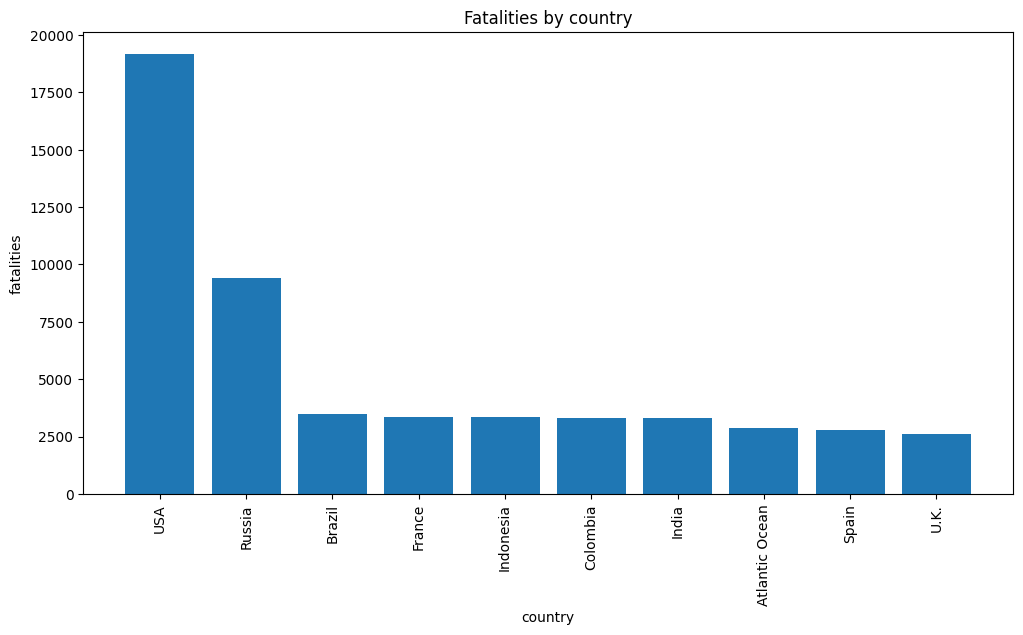

In [ ]:
plt.bar(fatalities_by_country.index, fatalities_by_country.values)
plt.xticks(rotation=90)
plt.xlabel("country")
plt.ylabel("fatalities")
plt.title("Fatalities by country")

Le nazioni in cui si sono sviluppati più incidenti sono USA, Russia e Brasile.

## Numero di fatalità raggruppato per compagnia aerea (peggiori compagnie aeree)

In [ ]:
fatalities_by_bestoperator=dataframe['fatalities'].groupby(dataframe['operator']).sum().sort_values(ascending=False).head(10)

Text(0.5, 1.0, 'Fatalities by operator')

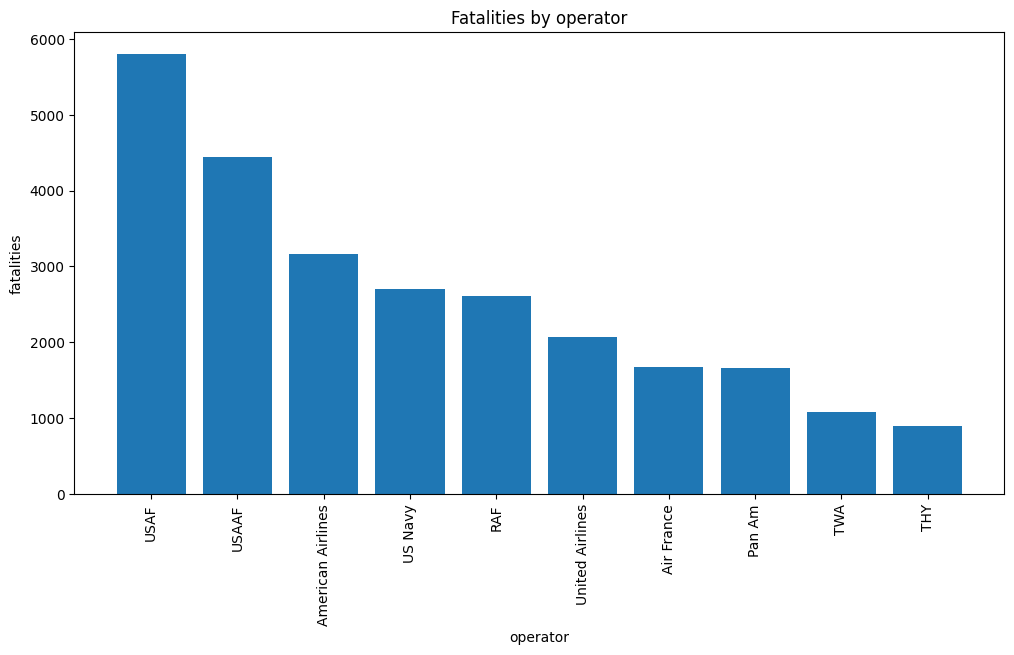

In [ ]:
plt.bar(fatalities_by_operator.index, fatalities_by_operator.values)
plt.xticks(rotation=90)
plt.xlabel("operator")
plt.ylabel("fatalities")
plt.title("Fatalities by operator")

Gli operatori meno sicuri sono USAF USAAF e American Airlines.

## Andamento delle morti per incidenti aerei negli anni

In [ ]:
dataframe_grouped_byear=dataframe['fatalities'].groupby(dataframe['year']).sum()
dataframe_grouped_byear

,fatalities
year,
1919,1
1920,4
1921,2
1922,5
1923,7
...,...
2019,469
2020,428
2021,321


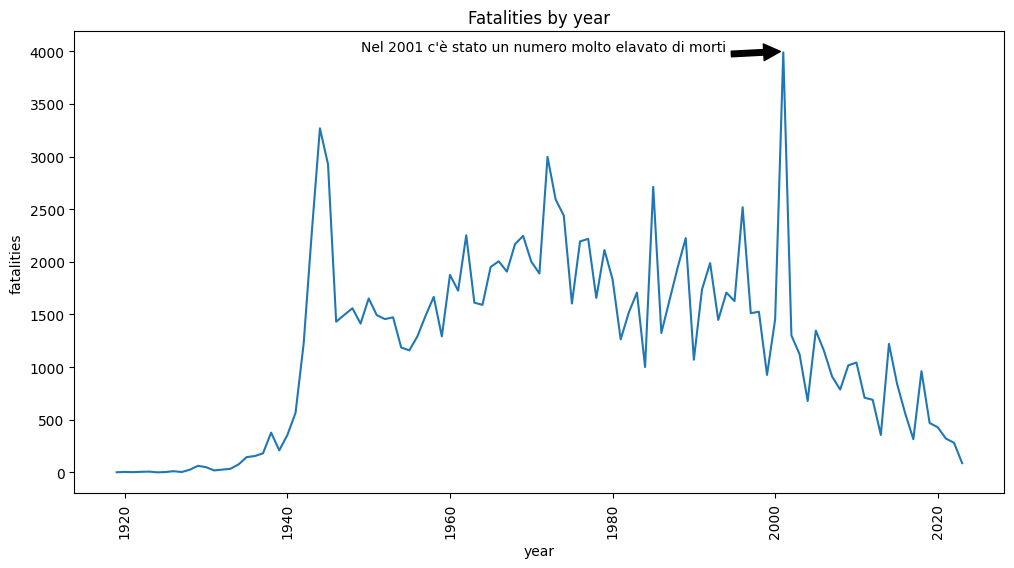

In [ ]:
import numpy as np
plt.plot(np.arange(1919, 2024), dataframe_grouped_byear.values)
plt.rcParams['figure.figsize'] = [12,6]
plt.xticks(rotation=90)
plt.xlabel("year")
plt.ylabel("fatalities")
plt.title("Fatalities by year")
plt.annotate("Nel 2001 c'è stato un numero molto elavato di morti",xy=(2001,4000),xytext=(1949,4000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

L'andamento delle fatalità nel tempo è abbastanza costante tra il 1950 e il 2000, mentre è in diminuzione dal 2000 circa in poi. Come si può vedere dal grafico, nel 2001 c'è stato un numero molto elevato di morti legati probabilmente al crollo delle torri gemelle.  